In [1]:
import pandas as pd
import numpy as np
import os
import re
import glob
import unzip_file

In [43]:
def import_48_hd_files_aa(file_dir, trim, keep):
    all_Files = glob.glob(os.path.join(file_dir, "*.txt"))
    li = []

    for file_ in all_Files:
        df = pd.read_csv(file_, index_col=0, header=0, sep=' ')
        df.drop(['mindex','Primer','Mod', 'Nuc'], axis=1, inplace=True)
        df.set_index('AA', inplace=True)
        print(f'Lenght of DF {file_} before: {len(df)}')
        print(len(df[df.index.duplicated(keep='first')]))
        df = df.loc[~df.index.duplicated(keep='first')]
        print(f'Len after {len(df)}')
        cols = df.columns[~df.columns.isin(['Nuc'])]
        df.rename(columns = dict(
            zip(cols, str(os.path.basename(file_)[:-4])+ '__' + cols))
        , inplace = True)
        li.append(df)
    
    df_full = pd.concat(li, axis=1)
    df_full = df_full.iloc[1:]
    if trim:
        
        df_full.index = df_full.index.str[-24:]

        if keep == 'sum':
            print(f'Lenght of DF {file_} before: {len(df_full)}')
            df_full = df_full.groupby(by=df_full.index).sum()
            print(f'Len after {len(df_full)}')
            

        else:
            print(f'Lenght of DF {file_} before: {len(df_full)}')
            df_full = df_full.loc[~df_full.index.duplicated(keep=keep)]
            print(f'Len after {len(df_full)}')

    df_full.fillna(0, inplace=True)
    return df_full

def load_vt_unfiltered_df_aa(file_path, trim, keep):
    df = pd.read_fwf(file_path, colspecs='infer')
    df = df[1:]
    df.rename(columns={'Tag':'Nuc'}, inplace=True)
    df.set_index('X', inplace=True)
    print(f'Lenght of DF_VT before: {len(df)}')
    print(len(df[df.index.duplicated(keep='first')]))
    df = df.loc[~df.index.duplicated(keep='first')]
    print(f'Len after {len(df)}')

    df.drop(columns=['Nuc'], inplace=True)
    
    df = df.apply(pd.to_numeric)
    df.fillna(0, inplace=True)

    if trim:
        df.index = df.index.str[-24:]

        if keep == 'sum':
            print(f'Lenght of DF {file_path} before: {len(df)}')
            df = df.groupby(by=df.index).sum()
            print(f'Len after {len(df)}')
            

        else:
            print(f'Lenght of DF {file_path} before: {len(df)}')
            df = df.loc[~df.index.duplicated(keep=keep)]
            print(f'Len after {len(df)}')

    return df

In [3]:
VT_FILE_PATH = 'data_files/VT_unfiltered_Feb.txt'
HD_48_FILE_PATH = '/home/sharyarmemon/Documents/GitHub/gesar-file-utility/data_files/unzipped_files'

In [44]:
df_vt = load_vt_unfiltered_df_aa(VT_FILE_PATH, False, 'sum')

Lenght of DF_VT before: 3095530
928452
Len after 2167078


In [16]:
df_48 = import_48_hd_files_aa(HD_48_FILE_PATH, False, 'sum')

Lenght of DF /home/sharyarmemon/Documents/GitHub/gesar-file-utility/data_files/unzipped_files/20180222-57NYooVH-VT.txt before: 219326
107528
Len after 111798
Lenght of DF /home/sharyarmemon/Documents/GitHub/gesar-file-utility/data_files/unzipped_files/20180222-57WIooVH-VT.txt before: 205076
99357
Len after 105719
Lenght of DF /home/sharyarmemon/Documents/GitHub/gesar-file-utility/data_files/unzipped_files/20180222-24WIsaVH-VG.txt before: 4636
1670
Len after 2966
Lenght of DF /home/sharyarmemon/Documents/GitHub/gesar-file-utility/data_files/unzipped_files/20180222-24WIsaVL-VG.txt before: 231618
23473
Len after 208145
Lenght of DF /home/sharyarmemon/Documents/GitHub/gesar-file-utility/data_files/unzipped_files/20180222-24OOsaVH-VG.txt before: 384306
2204
Len after 382102
Lenght of DF /home/sharyarmemon/Documents/GitHub/gesar-file-utility/data_files/unzipped_files/20180222-57WIsaVH-VT.txt before: 215116
105135
Len after 109981
Lenght of DF /home/sharyarmemon/Documents/GitHub/gesar-file-ut

In [6]:
intersecting_aa = df_vt.index.intersection(df_48.index)

,VT1,VT2,VT3,VT4,VT5,VT6,VT7,VT8,VT9,VT10,...,VT41,VT42,VT43,VT44,VT45,VT46,VT47,VT48,VT49,VT50
X,,,,,,,,,,,,,,,,,,,,,
*AIPIVVPFYSHSSYLGYPLQGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
*AIPLVVPFYSHSSAAVWDGYGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
*AIPLVVPFYSHSSNSFARGPGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
*AIPLVVPFYSHSSTELRKWLGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
*AIPLVVPFYSHSSYIPHSPTGGG,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YYYSQFLQWYLSILTLVCISGEEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YYYSQFLQWYLSILTLVLLCMEEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YYYSQFLQWYLSILTLVRCGVEEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
np.max(df_48.index.str.len())

37

In [9]:
intersecting_aa

Index([], dtype='object')

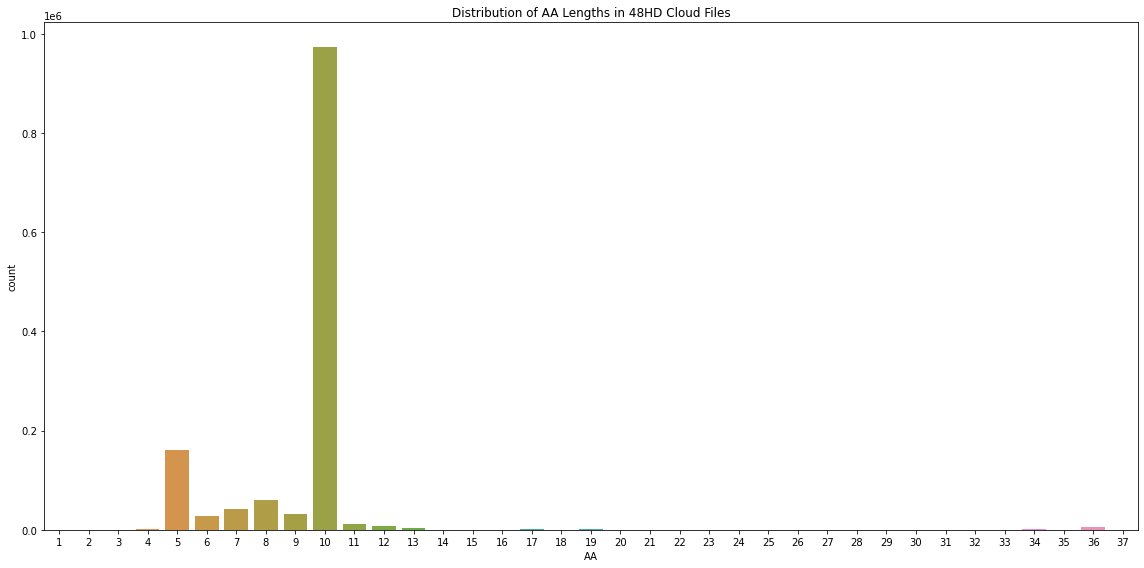

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))

sns.countplot(df_48.index.str.len(), ax=ax)
ax.set_title('Distribution of AA Lengths in 48HD Cloud Files')
fig.tight_layout()
fig.savefig('AA_Len_Distrib_48_Untrimmed.png')

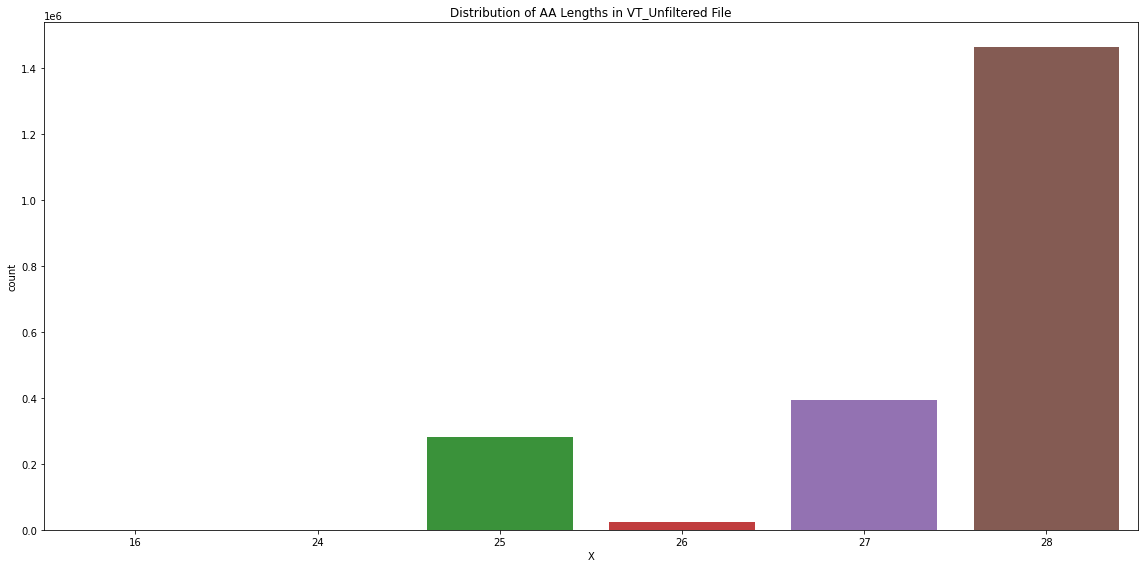

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))

sns.countplot(df_vt.index.str.len(), ax=ax)
ax.set_title('Distribution of AA Lengths in VT_Unfiltered File')
fig.tight_layout()
fig.savefig('AA_Len_Distrib_VT_Untrimmed.png')

In [47]:
list_idx_vt = [x for x in df_vt.index if len(x) == 27]

In [ ]:
list_idx = [x for x in df_48.index if len(x) == 10]

In [38]:
len(list_idx)

874

In [40]:
df_48.loc[list_idx]

,20180222-57NYooVH-VT__R7F1_RN1RP2,20180222-57NYooVH-VT__R7F2_RN1RP3,20180222-57NYooVH-VT__R6F20_RN1RP1,20180222-57WIooVH-VT__R6F14_RN1RP1,20180222-57WIooVH-VT__R6F15_RN1RP2,20180222-57WIooVH-VT__R6F16_RN1RP3,20180222-24WIsaVH-VG__R3F9_RN1RP1,20180222-24WIsaVH-VG__R3F10_RN1RP2,20180222-24WIsaVH-VG__R3F11_RN1RP3,20180222-24WIsaVL-VG__R3F12_RN1RP1,...,20180222-57OOooVH-VT__R8F11_RN1RP3,20180222-57WIsaVL-VT__R6F4_RN1RP1,20180222-57WIsaVL-VT__R6F5_RN1RP2,20180222-57WIsaVL-VT__R6F6_RN1RP3,20180222-57OOsaVH-VT__R6F11_RN1RP1,20180222-57OOsaVH-VT__R6F12_RN1RP2,20180222-57OOsaVH-VT__R6F13_RN1RP3,20180222-24NYooVH-VG__R9F5_RN1RP1,20180222-24NYooVH-VG__R9F6_RN1RP2,20180222-24NYooVH-VG__R9F8_RN1RP3
AA,,,,,,,,,,,,,,,,,,,,,
SPPHSSSRSF,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
SDYVRGMMEE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DYKDDDDKGA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
DSRMMMTKVE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
STLWFGYWRR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STCLHADMTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
STCPFSYLHC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
SMCFIDEADC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
df_vt.loc[list_idx_vt]

,VT1,VT2,VT3,VT4,VT5,VT6,VT7,VT8,VT9,VT10,...,VT41,VT42,VT43,VT44,VT45,VT46,VT47,VT48,VT49,VT50
X,,,,,,,,,,,,,,,,,,,,,
KKLLFAIPLVVPFYSHSSHTHDSVEGGG,0,0,0,0,0,0,0,0,0,0,...,105,90,273,262,169,210,142,155,161,118
KKLLFAIPLVVPFYSHSSSAPMMETGGG,0,0,0,0,0,0,1,0,0,0,...,59,62,166,158,112,116,52,82,103,61
KKLLFAIPLVVPFYSHSSDSRPNSHGGG,0,0,0,0,0,0,0,0,0,0,...,24,30,83,57,52,46,32,31,29,21
KKLLFAIPLVVPFYSHSSTKEHAPLGGG,0,0,0,0,0,0,0,0,0,0,...,21,24,77,72,37,35,28,39,48,22
KKLLFAIPLVVPFYSHSSETTLKVRGGG,0,0,0,0,0,0,0,0,0,0,...,22,22,42,60,45,55,33,43,46,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
*KLLFAIPLVVPFYSHSSFSTLKQTGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
*KLLFAIPLVVPFYSHSSFSNAILIGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
*KLLFAIPLVVPFYSHSCSHLPRGTGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
df_vt.loc[list_idx_vt]

,VT1,VT2,VT3,VT4,VT5,VT6,VT7,VT8,VT9,VT10,...,VT41,VT42,VT43,VT44,VT45,VT46,VT47,VT48,VT49,VT50
X,,,,,,,,,,,,,,,,,,,,,
KKLLFAIPLVVPFYSHSSWYDLYHGGG,202,246,187,336,173,351,116,24,80,11,...,110,48,418,56,45,3,0,0,0,0
KKLLFAIPLVVPFYSHSQFTQLHQGGG,1839,1988,1345,1848,906,1119,2932,1058,1330,756,...,0,0,6,0,0,0,0,0,0,0
KKLLFAIPLVVPFYSHSSQCGVHCGGG,202,176,131,144,88,110,190,99,132,116,...,0,0,0,0,0,0,0,0,0,0
KKLLFAIPLVVPFYSHSSFCNTNCGGG,124,100,83,98,43,98,121,89,85,78,...,0,0,0,0,0,0,0,0,0,0
KKLLFAIPLVVPFYSHSSVCYGICGGG,101,104,58,89,56,70,84,56,96,54,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
*KLLFAIPLVVPFYSHSSSFSWTVGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
*NLLYAIPLVVPFYSHSSSCAASCGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YKLLFAIPLVVPFYSHSSLYDLYHGGG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
